# Support Vector Machines - Exercise 1

In this exercise, we'll be using support vector machines (SVMs) to build a spam classifier.  We'll start with SVMs on some simple 2D data sets to see how they work.  Then we'll do some pre-processing work on a set of raw emails and build a classifier on the processed emails using a SVM to determine if they are spam or not.

The first thing we're going to do is look at a simple 2-dimensional data set and see how a linear SVM works on the data set for varying values of C (similar to the regularization term in linear/logistic regression).  Let's load the data.
## Exercise 1
#### 1. Load libraries

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### 2. Load data
Load the file *ejer_1_data1.mat*. Find the way for loading this kind of file. **scipy.io.loadmat**

In [94]:
from scipy.io import loadmat

mat = loadmat('data/ejer_1_data1.mat')
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:28:43 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[1.9643  , 4.5957  ],
        [2.2753  , 3.8589  ],
        [2.9781  , 4.5651  ],
        [2.932   , 3.5519  ],
        [3.5772  , 2.856   ],
        [4.015   , 3.1937  ],
        [3.3814  , 3.4291  ],
        [3.9113  , 4.1761  ],
        [2.7822  , 4.0431  ],
        [2.5518  , 4.6162  ],
        [3.3698  , 3.9101  ],
        [3.1048  , 3.0709  ],
        [1.9182  , 4.0534  ],
        [2.2638  , 4.3706  ],
        [2.6555  , 3.5008  ],
        [3.1855  , 4.2888  ],
        [3.6579  , 3.8692  ],
        [3.9113  , 3.4291  ],
        [3.6002  , 3.1221  ],
        [3.0357  , 3.3165  ],
        [1.5841  , 3.3575  ],
        [2.0103  , 3.2039  ],
        [1.9527  , 2.7843  ],
        [2.2753  , 2.7127  ],
        [2.3099  , 2.9584  ],
        [2.8283  , 2.6309  ],
        [3.0473  , 2.2931  ],
        [2.4827  , 2.0373  ],
        [2.5057 

In [4]:
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [5]:
mat['X']

array([[1.9643  , 4.5957  ],
       [2.2753  , 3.8589  ],
       [2.9781  , 4.5651  ],
       [2.932   , 3.5519  ],
       [3.5772  , 2.856   ],
       [4.015   , 3.1937  ],
       [3.3814  , 3.4291  ],
       [3.9113  , 4.1761  ],
       [2.7822  , 4.0431  ],
       [2.5518  , 4.6162  ],
       [3.3698  , 3.9101  ],
       [3.1048  , 3.0709  ],
       [1.9182  , 4.0534  ],
       [2.2638  , 4.3706  ],
       [2.6555  , 3.5008  ],
       [3.1855  , 4.2888  ],
       [3.6579  , 3.8692  ],
       [3.9113  , 3.4291  ],
       [3.6002  , 3.1221  ],
       [3.0357  , 3.3165  ],
       [1.5841  , 3.3575  ],
       [2.0103  , 3.2039  ],
       [1.9527  , 2.7843  ],
       [2.2753  , 2.7127  ],
       [2.3099  , 2.9584  ],
       [2.8283  , 2.6309  ],
       [3.0473  , 2.2931  ],
       [2.4827  , 2.0373  ],
       [2.5057  , 2.3853  ],
       [1.8721  , 2.0577  ],
       [2.0103  , 2.3546  ],
       [1.2269  , 2.3239  ],
       [1.8951  , 2.9174  ],
       [1.561   , 3.0709  ],
       [1.5495

#### 3. Create a DataFrame with the features and target

In [95]:
df = pd.DataFrame(mat['X'], columns= ['x1', 'x2'])

In [96]:
df['y'] = mat['y']

In [97]:
df

,x1,x2,y
0,1.964300,4.5957,1
1,2.275300,3.8589,1
2,2.978100,4.5651,1
3,2.932000,3.5519,1
4,3.577200,2.8560,1
5,4.015000,3.1937,1
6,3.381400,3.4291,1
7,3.911300,4.1761,1
8,2.782200,4.0431,1
9,2.551800,4.6162,1


#### 4. Plot a scatterplot with the data

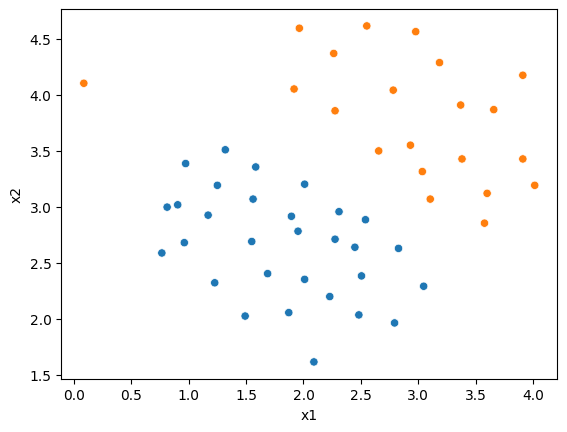

In [101]:
#Creamos scatter plot para mirar distribucion de datos
sns.scatterplot(data= df, x = 'x1', y= 'x2', hue= 'y', legend= False);

Notice that there is one outlier positive example that sits apart from the others.  The classes are still linearly separable but it's a very tight fit.  We're going to train a linear support vector machine to learn the class boundary.

#### 5. LinearSVC
Declare a Linear SVC with the hyperparamenters:

```Python
LinearSVC(C=1, loss='hinge', max_iter=10000)
```

In [102]:
#Vamos a utilizar LinearSVC para el problema y SVC para graficar
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

In [114]:
#Separacion en X e Y
X = df[['x1', 'x2']]
Y = df['y']

In [143]:
#Declaramos modelo linear_svc
linear_svc = LinearSVC(C=1, loss='hinge', max_iter=10000)

#Entrenamos el modelo
linear_svc.fit(df[['x1', 'x2']], df['y'])

LinearSVC(C=1, loss='hinge', max_iter=10000)

#### 6. Try the performance (score)
For the first experiment we'll use C=1 and see how it performs.

In [144]:
#Probamos el modelo, en este caso el accuracy no es de 100% porque teníamos un margen de tolerancia alto (C bajo (=1))
linear_svc.score(df[['x1', 'x2']], df['y'])

0.9803921568627451

In [106]:
#Modelo, perfomance igual al anterior pero nos servirá para graficar
graph_svc = SVC(C=1, max_iter= 10000, kernel= 'linear')
graph_svc.fit(df[['x1', 'x2']], df['y'])

SVC(C=1, kernel='linear', max_iter=10000)

In [107]:
#Vectores de soporte (Crean los puntos rojos en la gráfica, son en los que se fija el hiperplano óptimo para ser creado)
graph_svc.support_vectors_

array([[1.5841  , 3.3575  ],
       [2.0103  , 3.2039  ],
       [2.3099  , 2.9584  ],
       [2.8283  , 2.6309  ],
       [1.3191  , 3.5109  ],
       [2.5403  , 2.8867  ],
       [3.5772  , 2.856   ],
       [3.1048  , 3.0709  ],
       [1.9182  , 4.0534  ],
       [2.6555  , 3.5008  ],
       [3.0357  , 3.3165  ],
       [0.086405, 4.1045  ]])

In [126]:
#Coeficientes del hiperplano (Pesos de X1, X2)
graph_svc.coef_[0]

array([1.40718563, 2.13398052])

In [109]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    #Pesos
    w = svm_clf.coef_[0]
    #Intercepto
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1

    #Creabamos puntos entre un mínimo y un máximo para graficar
    x0 = np.linspace(xmin, xmax, 200)

    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)



In [112]:
#Esto lo usamos para grafixar
print(df.min())
print(df.max())

x1    0.086405
x2    1.617700
y     0.000000
dtype: float64
x1    4.0150
x2    4.6162
y     1.0000
dtype: float64


In [119]:
#Filttos dentro de la gráfica
X.iloc[:, 1][Y==1]

0     4.5957
1     3.8589
2     4.5651
3     3.5519
4     2.8560
5     3.1937
6     3.4291
7     4.1761
8     4.0431
9     4.6162
10    3.9101
11    3.0709
12    4.0534
13    4.3706
14    3.5008
15    4.2888
16    3.8692
17    3.4291
18    3.1221
19    3.3165
50    4.1045
Name: x2, dtype: float64

In [118]:
X.iloc[:, 0][Y==1]

0     1.964300
1     2.275300
2     2.978100
3     2.932000
4     3.577200
5     4.015000
6     3.381400
7     3.911300
8     2.782200
9     2.551800
10    3.369800
11    3.104800
12    1.918200
13    2.263800
14    2.655500
15    3.185500
16    3.657900
17    3.911300
18    3.600200
19    3.035700
50    0.086405
Name: x1, dtype: float64

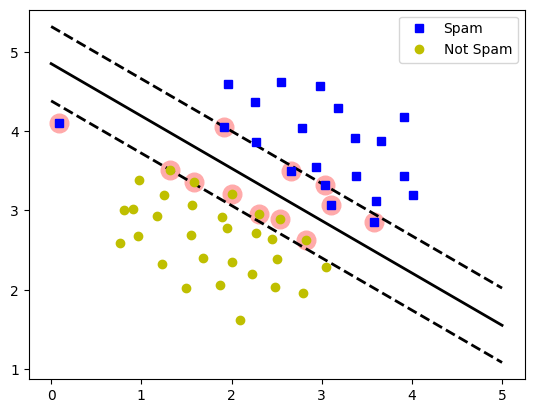

In [127]:
#CReamos gráfica
plot_svc_decision_boundary(graph_svc, 0, 5)
plt.plot(X.iloc[:, 0][Y==1], X.iloc[:, 1][Y==1], "bs", label="Spam")
plt.plot(X.iloc[:, 0][Y==0], X.iloc[:, 1][Y==0], "yo", label="Not Spam")
plt.legend();

It appears that it mis-classified the outlier.

#### 7. Increase the value of C until you get a perfect classifier

In [128]:
#Probamos margenes de tolerancia
cs = np.arange(1, 1000, 1)
scores = []

for c in cs:
    linear_svc = LinearSVC(C=c, loss='hinge', max_iter=10000)
    linear_svc.fit(df[['x1', 'x2']], df['y'])
    scores.append(linear_svc.score(df[['x1', 'x2']], df['y']))

c:\Users\migue\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
c:\Users\migue\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
c:\Users\migue\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
c:\Users\migue\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
c:\Users\migue\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iter

In [133]:
scores

[0.9803921568627451,
 0.9803921568627451,
 0.9803921568627451,
 0.9803921568627451,
 0.9803921568627451,
 0.9803921568627451,
 0.9803921568627451,
 0.9803921568627451,
 0.9803921568627451,
 0.9803921568627451,
 0.9803921568627451,
 0.9803921568627451,
 0.9803921568627451,
 0.9803921568627451,
 0.9803921568627451,
 0.9803921568627451,
 0.9803921568627451,
 0.9803921568627451,
 0.9803921568627451,
 0.9803921568627451,
 0.9803921568627451,
 0.9803921568627451,
 0.9803921568627451,
 0.9803921568627451,
 0.9803921568627451,
 0.9803921568627451,
 0.9803921568627451,
 0.9803921568627451,
 0.9803921568627451,
 0.9803921568627451,
 0.9803921568627451,
 0.9803921568627451,
 0.9803921568627451,
 0.9803921568627451,
 0.9803921568627451,
 0.9803921568627451,
 0.9803921568627451,
 0.9803921568627451,
 0.9803921568627451,
 0.9803921568627451,
 0.9803921568627451,
 0.9803921568627451,
 0.9803921568627451,
 0.9803921568627451,
 0.9803921568627451,
 0.9803921568627451,
 0.9803921568627451,
 0.9803921568

In [132]:
#Buscamos c cuando score = 1
cs[scores.index(np.max(scores))]

330

In [149]:
#Modelo con score = 1
linear_svc_2 = LinearSVC(C=330, loss='hinge', max_iter=10000)
linear_svc_2.fit(X, Y)
linear_svc_2.score(X, Y)

c:\Users\migue\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


0.9803921568627451

In [135]:
graph_svc_2 = SVC(C=330, max_iter= 10000, kernel= 'linear')
graph_svc_2.fit(X, Y)


SVC(C=330, kernel='linear', max_iter=10000)

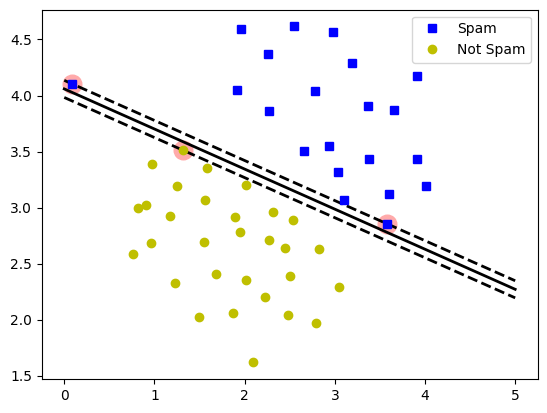

In [136]:
#Gráfica modelo con score = 1 (C muy alto)
plot_svc_decision_boundary(graph_svc_2, 0, 5)
plt.plot(X.iloc[:, 0][Y==1], X.iloc[:, 1][Y==1], "bs", label="Spam")
plt.plot(X.iloc[:, 0][Y==0], X.iloc[:, 1][Y==0], "yo", label="Not Spam")
plt.legend();

This time we got a perfect classification of the training data, however by increasing the value of C we've created a decision boundary that is no longer a natural fit for the data.  We can visualize this by looking at the confidence level for each class prediction, which is a function of the point's distance from the hyperplane.

#### 8. Plot Decission Function
Get the `decision_function()` output for the first model. Plot a scatterplot with X1, X2 and a range of colors based on `decision_function()`

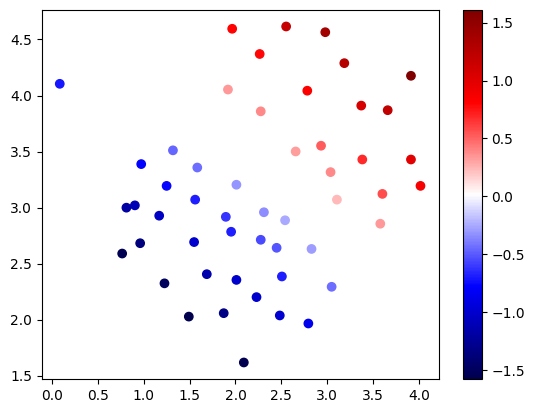

In [145]:
#Función de decisión para ver que tan seguro está el modelo de sus predicciones
plt.scatter(x = df['x1'], y = df['x2'], c= linear_svc.decision_function(X), cmap= 'seismic')
plt.colorbar();

#### 9. Do the same with the second model

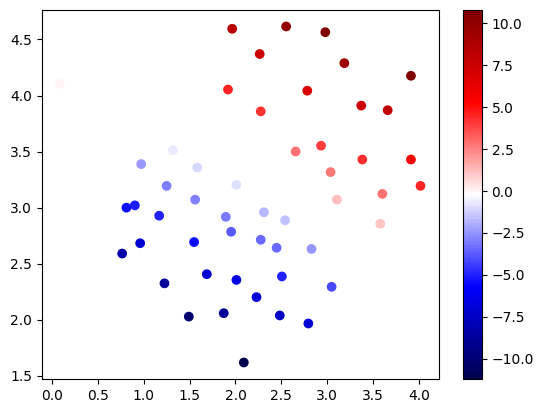

In [151]:
#Igual que el anterior
plt.scatter(x = df['x1'], y = df['x2'], c= linear_svc_2.decision_function(X), cmap= 'seismic')
plt.colorbar();


https://www.svm-tutorial.com/2015/06/svm-understanding-math-part-3/

Now we're going to move from a linear SVM to one that's capable of non-linear classification using kernels.  We're first tasked with implementing a gaussian kernel function.  Although scikit-learn has a gaussian kernel built in, for transparency we'll implement one from scratch.

## Exercise 2

That result matches the expected value from the exercise.  Next we're going to examine another data set, this time with a non-linear decision boundary.

#### 1. Load the data `ejer_1_data2.mat`

In [152]:
from scipy.io import loadmat
import pandas as pd
import seaborn as sns

In [153]:
mat = loadmat('data/ejer_1_data2.mat')
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:28:54 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0.107143 , 0.60307  ],
        [0.093318 , 0.649854 ],
        [0.0979263, 0.705409 ],
        ...,
        [0.975806 , 0.439474 ],
        [0.989631 , 0.425439 ],
        [0.996544 , 0.414912 ]]),
 'y': array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
       

In [154]:
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [155]:
mat['X']

array([[0.107143 , 0.60307  ],
       [0.093318 , 0.649854 ],
       [0.0979263, 0.705409 ],
       ...,
       [0.975806 , 0.439474 ],
       [0.989631 , 0.425439 ],
       [0.996544 , 0.414912 ]])

#### 2. Create a DataFrame with the features and target

In [156]:
df_2 = pd.DataFrame(mat['X'], columns= ['x1', 'x2'])

In [157]:
df_2['y'] = mat['y']

In [158]:
df_2

,x1,x2,y
0,0.107143,0.603070,1
1,0.093318,0.649854,1
2,0.097926,0.705409,1
3,0.155530,0.784357,1
4,0.210829,0.866228,1
...,...,...,...
858,0.994240,0.516667,1
859,0.964286,0.472807,1
860,0.975806,0.439474,1
861,0.989631,0.425439,1


#### 3. Plot a scatterplot with the data

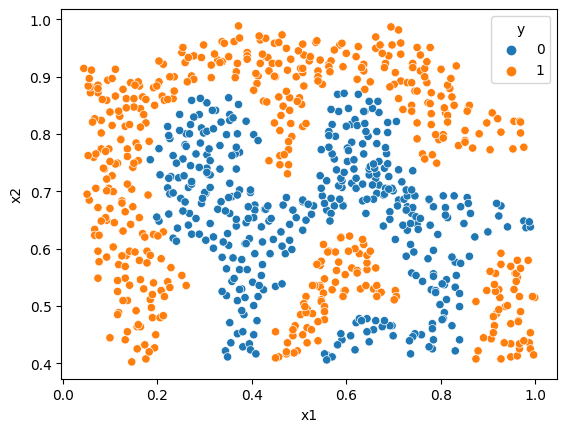

In [161]:
sns.scatterplot(x = df_2['x1'], y= df_2['x2'], hue= df_2['y']);

For this data set we'll build a support vector machine classifier using the built-in RBF kernel and examine its accuracy on the training data.  To visualize the decision boundary, this time we'll shade the points based on the predicted probability that the instance has a negative class label.  We'll see from the result that it gets most of them right.

#### 4. Declare a SVC with this hyperparameters
```Python
SVC(C=100, gamma=10, probability=True)
```


In [162]:
svc_rbf = SVC(C=100, gamma=10, probability=True)

#### 5. Fit the classifier and get the score

In [164]:
svc_rbf.fit(df_2[['x1', 'x2']], df_2['y'])

SVC(C=100, gamma=10, probability=True)

In [165]:
svc_rbf.score(df_2[['x1', 'x2']], df_2['y'])

0.9698725376593279

#### 6. Plot the scatter plot and probability of predicting 0 with a [sequential color](https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html)

In [171]:
svc_rbf.predict_proba(df_2[['x1', 'x2']])[:, 0]

array([3.00000090e-14, 3.00000090e-14, 3.00000090e-14, 5.36221501e-07,
       5.07885815e-03, 1.46552086e-05, 6.63435571e-08, 9.48152639e-03,
       3.00000090e-14, 3.00000090e-14, 3.00000090e-14, 1.11185713e-02,
       5.75348605e-12, 3.00000090e-14, 3.00000090e-14, 2.84769903e-10,
       2.46111555e-01, 5.83128817e-01, 3.00000090e-14, 3.00000090e-14,
       1.30360098e-02, 8.38658710e-06, 7.72931274e-03, 1.17384427e-01,
       1.66742326e-02, 1.69985468e-06, 8.38275665e-07, 1.86703430e-07,
       2.49545889e-06, 2.09398804e-02, 1.56232830e-01, 2.58633911e-02,
       3.00000090e-14, 3.00000090e-14, 3.00000090e-14, 3.00000090e-14,
       3.00000090e-14, 2.12517049e-13, 2.35705757e-10, 3.00000090e-14,
       3.00000090e-14, 3.00000090e-14, 3.00000090e-14, 3.00000090e-14,
       3.00000090e-14, 3.00000090e-14, 3.00000090e-14, 1.01543885e-10,
       4.97274825e-14, 3.00000090e-14, 3.44395856e-09, 1.26438127e-07,
       8.27201633e-06, 6.06168601e-14, 3.00000090e-14, 3.00000090e-14,
      

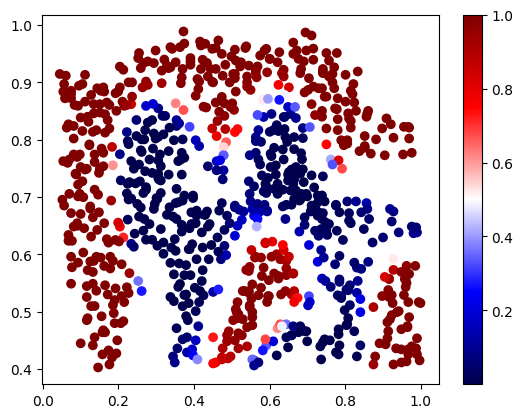

In [173]:
#MIramos seguridad del modelo en cuanto a probabilidades de predecir 1
plt.scatter(x = df_2['x1'], y = df_2['x2'], c=svc_rbf.predict_proba(df_2[['x1', 'x2']])[:, 1] , cmap= 'seismic')
plt.colorbar();